In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/maurizioaltieri/project/main/AMZN-3.csv'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'].dt.year >= 2000)].copy()
df.index = range(len(df))

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
1,2000-01-04,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2,2000-01-05,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
3,2000-01-06,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
4,2000-01-07,3.350000,3.525000,3.309375,3.478125,3.478125,210108000


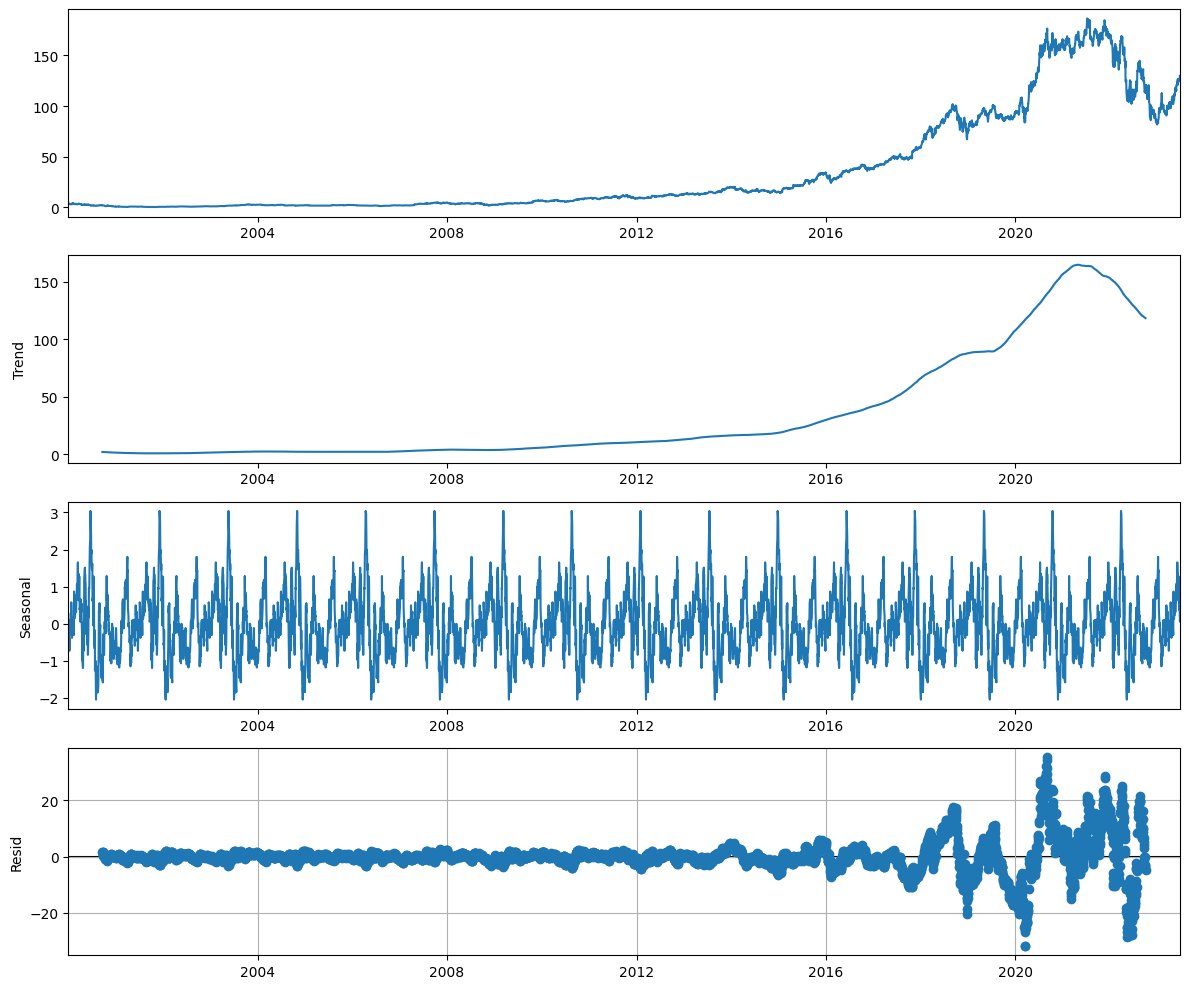

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df_close = df[['Date', 'Adj Close']].copy()
df_close = df_close.set_index('Date')
df_close.head()

decomp = seasonal_decompose(df_close, period = 365)
fig = decomp.plot()
fig.set_size_inches(12, 10)
fig.tight_layout()
plt.grid(True)
plt.show()

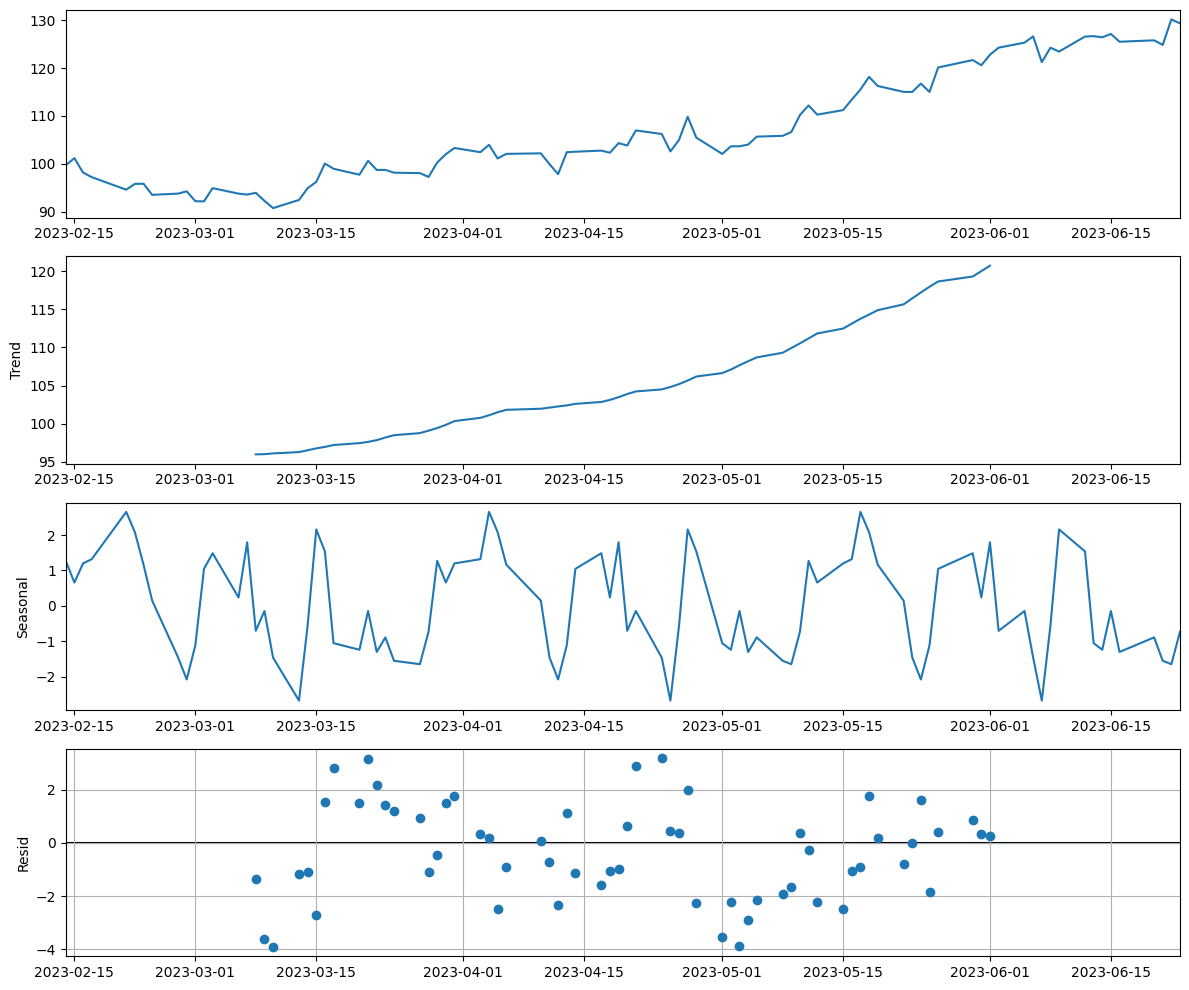

In [ ]:
decomposition = seasonal_decompose(df_close.tail(90), period=30)
fig = decomposition.plot()
fig.set_size_inches(12, 10)
fig.tight_layout()
plt.grid(True)
plt.show()
plt.show()

In [ ]:
def check_stationarity(series):
    # Thanks to https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")

    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
check_stationarity(train_df['Adj Close'])

ADF Statistic: 4.800393
p-value: 1.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Non-stationary


In [ ]:
check_stationarity(train_df['Adj Close'].diff().dropna())

ADF Statistic: -9.478421
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
